In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [12]:
def computer_vision_soft_version(file):
    """
    This function takes a AG test photo and returns the student answer box

    Parameters
    file :  the Photo of the AG test in opencv file object note high quality as possible
    """
    
    img = file
    imgr = img.copy()
    # convert it to grayscale
    img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # binarzation
    img_bin = cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY)[1]
    # invert the image
    img_bininv = cv2.bitwise_not(img_bin)
    # Apply morphological operations to remove small noise regions Note use this if the image low quality only
    # Note use this if the image low quality only and if there is a error on the number of answers otherwise leave commented out
    #kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    #img_bininv = cv2.morphologyEx(img_bininv, cv2.MORPH_OPEN, kernel)

    # getting the contours
    contours , hier = cv2.findContours(img_bininv,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    # Step one of filtering the contours: Geting only the contours with respect hight and width
    good_contours = []
    for con in contours:
        x, y, w, h = cv2.boundingRect(con)
        if h > 70 and w > 700 :
            good_contours.append(con)
    # Step two of filtering the contours: Removing duplicates 
    pre_x = None
    pre_y = None
    good_contourss = []
    for con in good_contours:
        x, y, w, h = cv2.boundingRect(con)
        if h > 70 and w > 700 :
            if pre_x is None and pre_y is None:
                good_contourss.append(con) #print("abroved")
            else:
                if ((abs(x - pre_x) > 300) or (abs(y - pre_y) > 300)):
                    good_contourss.append(con)#print("abroved")
        pre_x = x
        pre_y = y
    # now get each answer in the photo
    Answers = []
    for contour in good_contourss:
        # getting the answer dimensions 
        x, y, w, h = cv2.boundingRect(contour)
        # cropping based on the dimensions
        cropped_image = imgr[y:y+h, x:x+w]
        Answers.append(cropped_image)
    height, width, channels = imgr.shape
    return Answers , good_contourss , height, width


In [13]:
def computer_vision_soft_version_file_ide(files):
    """
    This function takes a AG test photo and returns the student answer box

    Parameters
    file :  the Photo of the AG test in opencv file object note high quality as possible
    """
    loaded_file =[]
    for file in files:
        img = file
        imgr = img.copy()
        # convert it to grayscale
        img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        # binarzation
        img_bin = cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY)[1]
        # invert the image
        img_bininv = cv2.bitwise_not(img_bin)
        # Apply morphological operations to remove small noise regions Note use this if the image low quality only
        # Note use this if the image low quality only and if there is a error on the number of answers otherwise leave commented out
        #kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
        #img_bininv = cv2.morphologyEx(img_bininv, cv2.MORPH_OPEN, kernel)

        # getting the contours
        contours , hier = cv2.findContours(img_bininv,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
        # Step one of filtering the contours: Geting only the contours with respect hight and width
        good_contours = []
        for con in contours:
            x, y, w, h = cv2.boundingRect(con)
            if h > 70 and w > 700 :
                good_contours.append(con)
        # Step two of filtering the contours: Removing duplicates 
        pre_x = None
        pre_y = None
        good_contourss = []
        for con in good_contours:
            x, y, w, h = cv2.boundingRect(con)
            if h > 70 and w > 700 :
                if pre_x is None and pre_y is None:
                    good_contourss.append(con) #print("abroved")
                else:
                    if ((abs(x - pre_x) > 300) or (abs(y - pre_y) > 300)):
                        good_contourss.append(con)#print("abroved")
            pre_x = x
            pre_y = y
        # now get each answer in the photo
        Answers = []
        for contour in good_contourss:
            # getting the answer dimensions 
            x, y, w, h = cv2.boundingRect(contour)
            # cropping based on the dimensions
            cropped_image = imgr[y:y+h, x:x+w]
            Answers.append(cropped_image)
        height, width, channels = imgr.shape
        sorted_good_contourss = []
        for con in good_contourss:
            sorted_good_contourss.insert(0,con)
        sorted_ans = []
        for ans in Answers:
            sorted_ans.insert(0,ans)
        loaded_file.append([sorted_ans,sorted_good_contourss,height,width])
    
    return loaded_file

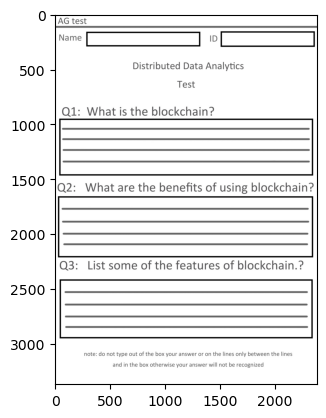

In [14]:
img = cv2.imread(r"D:\Academics\DS\Project\Project IV\Form\new_test_1.jpg")
plt.imshow(img)

In [15]:
answers , countor, height, width= computer_vision_soft_version(img)

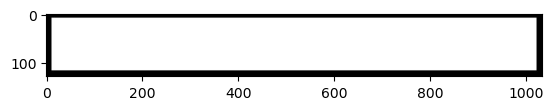

In [16]:
plt.imshow(answers[3])

In [17]:
loaded_f = computer_vision_soft_version_file_ide([img])

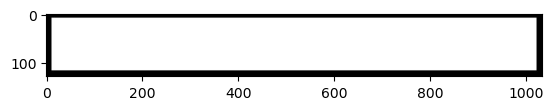

In [63]:
plt.imshow(loaded_f[0][0][1])

In [19]:
x, y, w, h = cv2.boundingRect(loaded_f[0][1][0])

In [20]:
cropped_image = img[y:y+h, x:x+w]

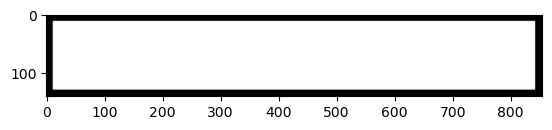

In [21]:
plt.imshow(cropped_image)

In [22]:
page_1 = cv2.imread(r"D:\Academics\DS\Project\Project IV\Form\new_test_1.jpg")
page_2 = cv2.imread(r"D:\Academics\DS\Project\Project IV\Form\new_test_2.jpg")
page_3 = cv2.imread(r"D:\Academics\DS\Project\Project IV\Form\new_test_3.jpg")

long_exam =[page_1,page_2,page_3]

In [23]:
loaded_exam = computer_vision_soft_version_file_ide(long_exam)

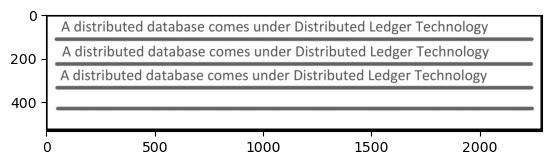

In [24]:
plt.imshow(loaded_exam[2][0][2])

In [25]:
img_with_writting = cv2.imread(r"D:\Academics\DS\Project\Project IV\Form\new_test_3.jpg")

In [26]:
x, y, w, h = cv2.boundingRect(loaded_exam[2][1][2])

In [27]:
cropped_image = img_with_writting[y:y+h, x:x+w]

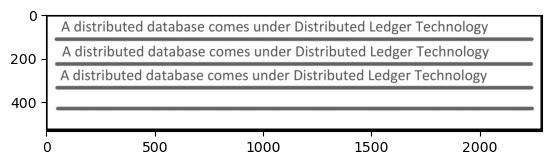

In [28]:
plt.imshow(cropped_image)

In [30]:
def computer_vision_scanned_version(img , contours, height, width):
    img_scanned_resized = cv2.resize(img, (width, height))
    Answers = []
    for contour in contours:
        # getting the answer dimensions 
        x, y, w, h = cv2.boundingRect(contour)
        # cropping based on the dimensions
        cropped_image = img_scanned_resized[y:y+h, x:x+w]
        Answers.append(cropped_image)
    return Answers

Lets assume that the computer version is the scanned version


In [31]:
img_scanned = cv2.imread(r"D:\Academics\DS\Project\Project IV\Form\new_test_1.jpg")

In [32]:
ans = computer_vision_scanned_version(img_scanned , countor, height,width)

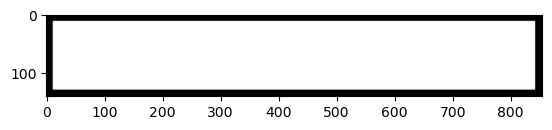

In [34]:
plt.imshow(ans[4])

In [35]:
def computer_vision_scanned_version_file_ide(img_files ,loaded_file):

    """
    This function take the loaded_file form computer_vision_soft_version_file_ide function and images of an scanned exam and return the sorted list 
    of answers

    img_files: scanned exam papers in order [form Pdf2image preferably]
    loaded_file: the file output ofcomputer_vision_soft_version_file_ide that is has been ran on the same img_files
    """
    answers = []
    for i in range(len(img_files)):
        img_scanned_resized =cv2.resize(img_files[i], (loaded_file[i][3], loaded_file[i][2]))
        answerss = []
        for contour in loaded_file[i][1]:
            # getting the answer dimensions 
            x, y, w, h = cv2.boundingRect(contour)
            # cropping based on the dimensions
            cropped_image = img_scanned_resized[y:y+h, x:x+w]
            answerss.append(cropped_image)
        answers.extend(answerss)
    return(answers)
        
            
        

    

lets assumne again that the computer version is the scanned version

In [36]:
answers_scanned = computer_vision_scanned_version_file_ide(long_exam,loaded_exam)

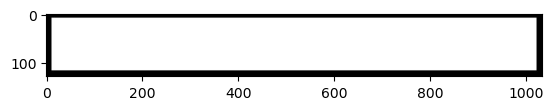

In [40]:
plt.imshow(answers_scanned[1])

In [41]:
# first is the imports 
import fitz # note in install this use pip install PyMuPDF
import matplotlib.pyplot as plt
from PIL import Image

In [42]:
def Pdf2Image(inputtype, path= None , file=None,  quality = 4):
    """
    Pdf2Image function take pdf file and return image/s file in PIL library format

    Parameters
    inputtype : is the input type 0 if path 1 if object note the object type must be fitz
    path : the path of the pdf object to be converted note input this or file note both
    file : the file in fitz library format note input this or path note both
    quality : the quality of the resulting image/s note the higher the quality the higher the size of the image/s defult 4

    """
    if inputtype is None:
        print("please insert Input type 0 if path 1 if file note the object type must be fitz")
        return None

    if inputtype==0:
        docs = fitz.open(r""+path)
        mat = fitz.Matrix(quality,quality)
        pixs = []
        for page in docs:
            pix = page.get_pixmap(matrix =mat)
            img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
            pixs.append(img)
        return pixs
    elif inputtype==1:
        docs = file
        mat = fitz.Matrix(quality,quality)
        pixs = []
        for page in docs:
            pix = page.get_pixmap(matrix =mat)
            img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
            pixs.append(img)
        return pixs        


In [43]:
test = Pdf2Image(inputtype=0, path=r"D:\Academics\DS\Project\Project IV\Form\New_Form_Head-combined.pdf")

In [47]:
def Pil2cv_converter(File):
    """
    This Function takes PIL file And converts it to opencv file

    Parameters
    
    File : The PIL file
    """
    # Open a PIL image
    pil_image = File

    # Convert PIL image to NumPy array
    numpy_array = np.array(pil_image)

    # Convert NumPy array to OpenCV image
    # note native OpenCV files are BGR you can convert to RGB later
    opencv_image = cv2.cvtColor(numpy_array, cv2.COLOR_RGB2BGR)
    
    return opencv_image

In [50]:
fo = []
for i in range(3):
    fo.append(Pil2cv_converter(test[i]))

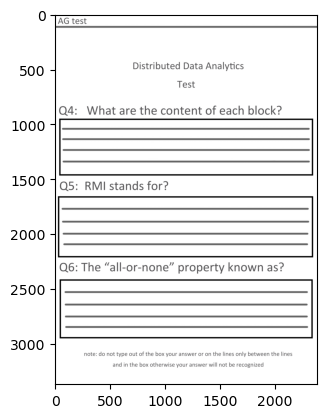

In [53]:
plt.imshow(fo[1])

In [54]:
loaded_fi = computer_vision_soft_version_file_ide(fo)

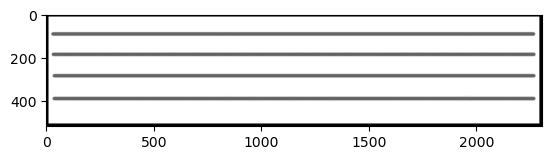

In [66]:
plt.imshow(loaded_fi[0][0][2])

In [67]:
test_pip = computer_vision_scanned_version_file_ide(fo,loaded_fi)

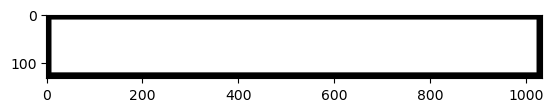

In [69]:
plt.imshow(test_pip[1])

In [70]:
len(test_pip)

11